## Economic Results by President

In [1]:
## Import packages
import os
from pathlib import Path
from utils.tsutils import (
    get_fred_data,
    read_data_from_json,
    get_recession_intervals,
    LABEL_MAP,
    write_data_to_json,
    plot_all)
import matplotlib.pyplot as plt
#plt.style.use("seaborn")
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter('ignore')
%matplotlib inline
pd.set_option("display.max_rows", None)

In [2]:
if Path("data/fred_data.json").is_file():
    data = read_data_from_json()
else:
    data = get_fred_data()
    write_data_to_json(data)
    data = read_data_from_json()

In [3]:
data['real_gdp'].head()

,date,real_gdp,president,party,inaug_date
0,1947-01-01,2034.450,Truman,Democrat,1945-04-12
1,1947-04-01,2029.024,Truman,Democrat,1945-04-12
2,1947-07-01,2024.834,Truman,Democrat,1945-04-12
3,1947-10-01,2056.508,Truman,Democrat,1945-04-12
4,1948-01-01,2087.442,Truman,Democrat,1945-04-12


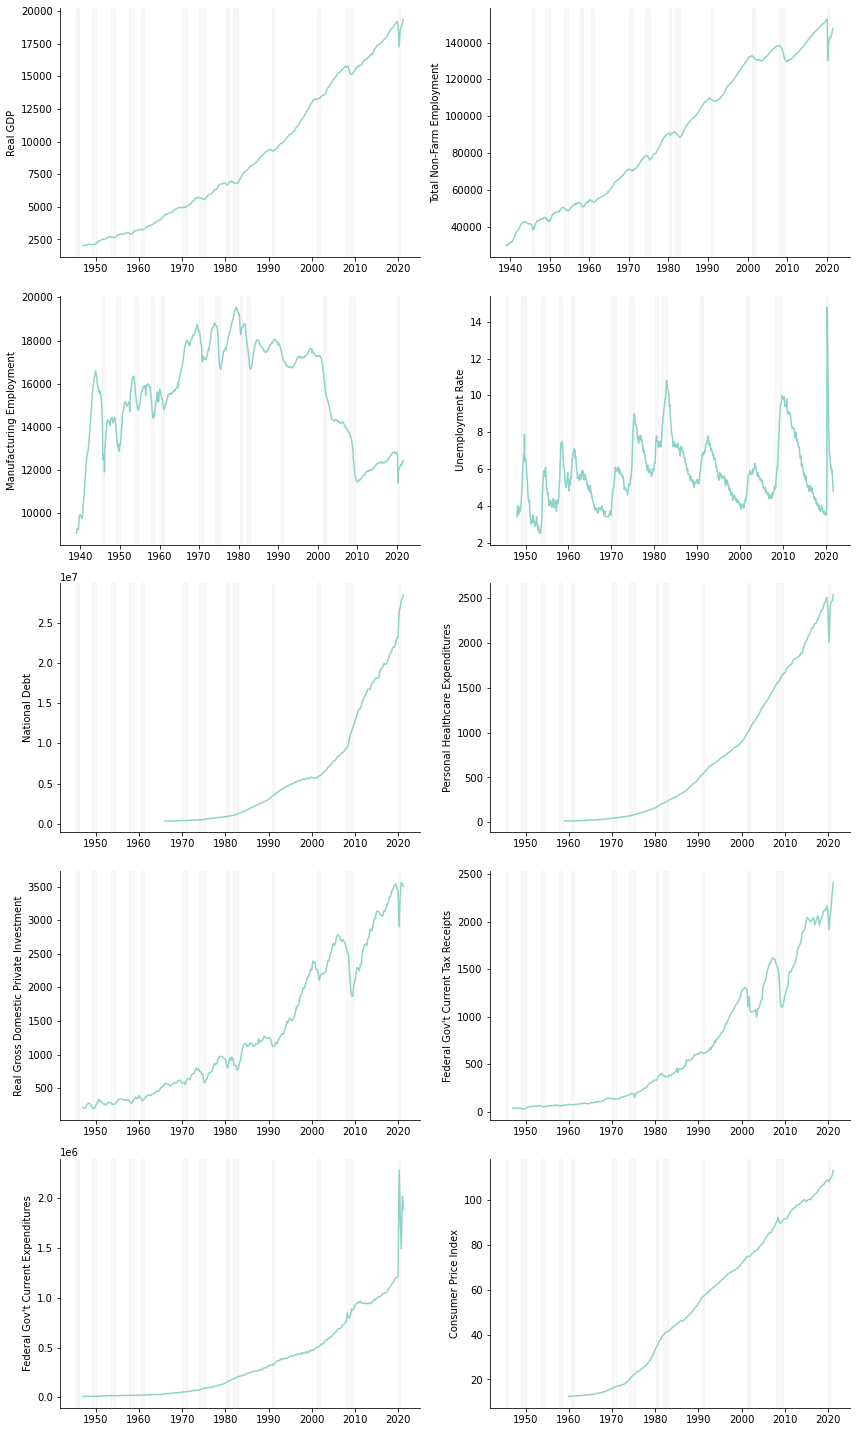

In [4]:
plot_all(data);

In [5]:
data.keys()

dict_keys(['real_gdp', 'tot_non_farm_empl', 'manufact_empl', 'unemploy_rate', 'national_debt', 'recession', 'pers_hlthcr_exp', 'real_grss_dom_prv_inv', 'fed_gov_curr_tax_receipts', 'fed_gov_curr_exp', 'cpi'])

In [6]:
recessions = get_recession_intervals(data['recession'])

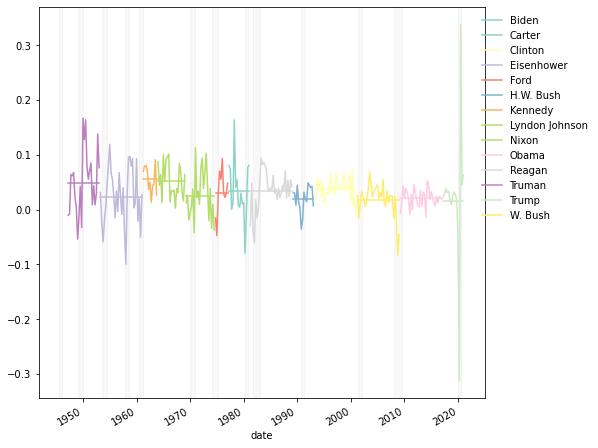

In [7]:
x = 'real_gdp'
groups = "president"
from scipy.stats.mstats import gmean
from strappy.utils.formatters import fix_legend

zzz = (data[x]
    .assign(delta = lambda df: df[x] / df[x].shift())
    .dropna()
    .assign(perc = lambda df: df.groupby(groups)['delta'].transform(gmean))
    .assign(delta_an = lambda df: df["delta"].map(lambda x: x**4 - 1))
    .assign(perc = lambda df: df["perc"].map(lambda x: x**4 - 1)))

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
for name, group in zzz.groupby(['president']):
    plot_obj = group.plot(x="date", y="delta_an", ax=ax, label=name)
    group.plot(x="date", y="perc", ax=ax, color=plot_obj.lines[-1].get_color(), label=name, legend=False)

for x in recessions:
    if x[0] >= np.datetime64('1939-01-01'):
        ax.axvspan(x[0], x[1], alpha=0.05, color='grey')

fix_legend(ax)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor = (1.25,1.0), frameon = False)

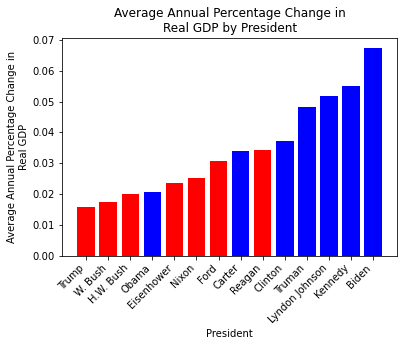

In [8]:
def pres_bar_plot(data, x, freq="Q",transform="gmean"):
    if freq == "Q" : z=4
    elif freq == "M": z=12
    elif freq == "Y": z=1

    if transform == "gmean":
        transform = gmean
    elif transform == "mean":
        transform = np.mean
    elif transform == "median":
        transform = np.median
    zzz = (data[x]
        .assign(delta = lambda df: df[x] / df[x].shift())
        .dropna()
        .assign(perc = lambda df: df.groupby("president")['delta'].transform(transform))
        .assign(delta_an = lambda df: df["delta"].map(lambda x: x**z - 1))
        .assign(perc = lambda df: df["perc"].map(lambda x: x**z - 1)))
    yyy = (zzz
        .loc[:,["president","perc","party"]]
        .assign(color = lambda df: df.party.map(lambda x: 'blue' if x=='Democrat' else 'red'))
        .drop_duplicates()
        .sort_values('perc'))
    fig, ax = plt.subplots(1,1);

    ax.bar(yyy["president"],yyy["perc"], color=yyy['color']);
    plt.setp(ax.get_xticklabels(), ha="right", rotation=45);
    ax.set_title(f"Average Annual Percentage Change in\n{LABEL_MAP[x]} by President");
    ax.set_ylabel(f"Average Annual Percentage Change in\n{LABEL_MAP[x]}");
    ax.set_xlabel("President");
    return fig

fig = pres_bar_plot(data,"real_gdp", freq="Q");
#fig.gca().set_ylabel("Average Annual Real GDP Growth");
#fig.gca().set_title("Average Annual Real GDP Growth by President");

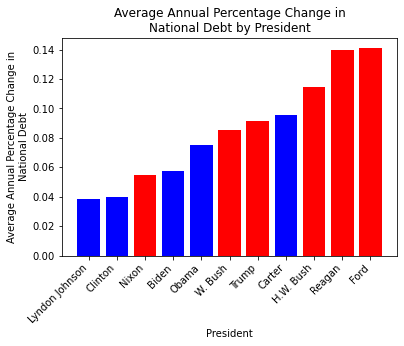

In [9]:
fig = pres_bar_plot(data,"national_debt", freq="Q");
#fig.gca().set_ylabel("Average Annual Growth in National Debt");
#fig.gca().set_title("Average Annual Growth in National Debt by President");

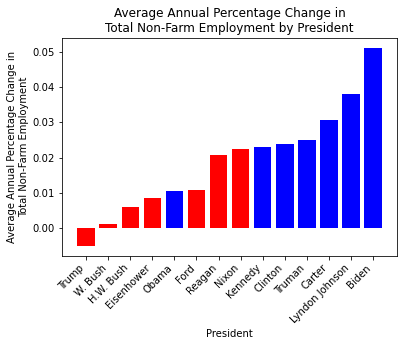

In [10]:
#data['unemploy_rate']
fig = pres_bar_plot(data,"tot_non_farm_empl", freq="M");
#fig.gca().set_ylabel("Average Annual Percentage Change in\nTotal Non-Farm Employment");
#fig.gca().set_title("Average Annual Percentage Change in\nTotal Non-Farm Employment by President");

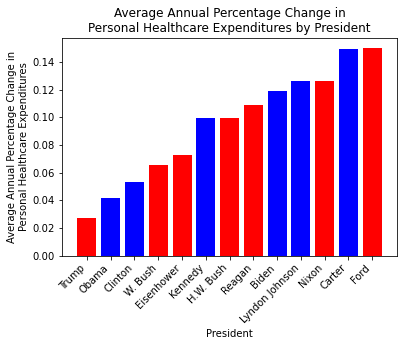

In [11]:
#data['pers_hlthcr_exp']
fig = pres_bar_plot(data,"pers_hlthcr_exp", freq="Q");
#fig.gca().set_ylabel("Average Annual Percentage Change in\nPersonal Healthcare Expenditures");
#fig.gca().set_title("Average Annual Percentage Change in\nPersonal Healthcare Expenditures by President");

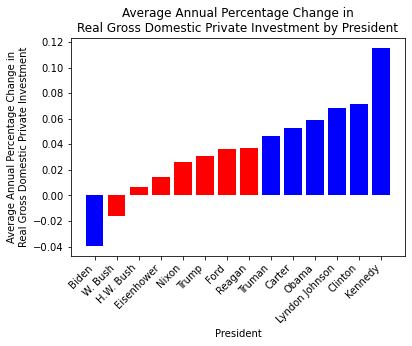

In [12]:
#data['pers_hlthcr_exp']
fig = pres_bar_plot(data,"real_grss_dom_prv_inv", freq="Q");
#fig.gca().set_ylabel("Average Annual Percentage Change in\nReal Gross Domestic Private Investment");
#fig.gca().set_title("Average Annual Percentage Change in\nReal Gross Domestic Private Investment by President");

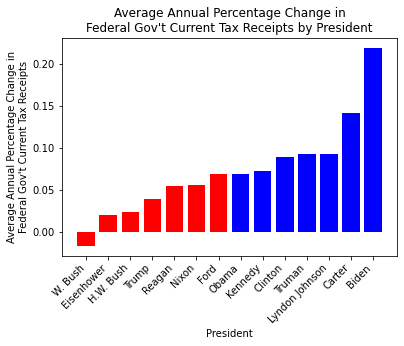

In [13]:
#data['pers_hlthcr_exp']
fig = pres_bar_plot(data,"fed_gov_curr_tax_receipts", freq="Q");
#fig.gca().set_ylabel("Average Annual Percentage Change in\nFederal Gov't Current Tax Receipts");
#fig.gca().set_title("Average Annual Percentage Change in\nFederal Gov't Current Tax Receipts by President");

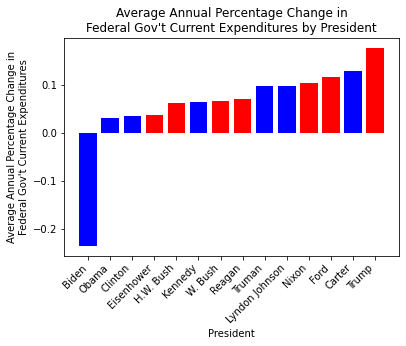

In [14]:
#data['pers_hlthcr_exp']
fig = pres_bar_plot(data,"fed_gov_curr_exp", freq="Q");

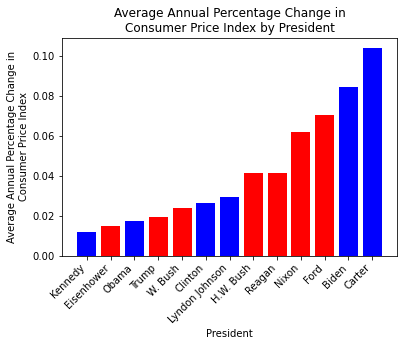

In [15]:
fig = pres_bar_plot(data,"cpi", freq="Q");

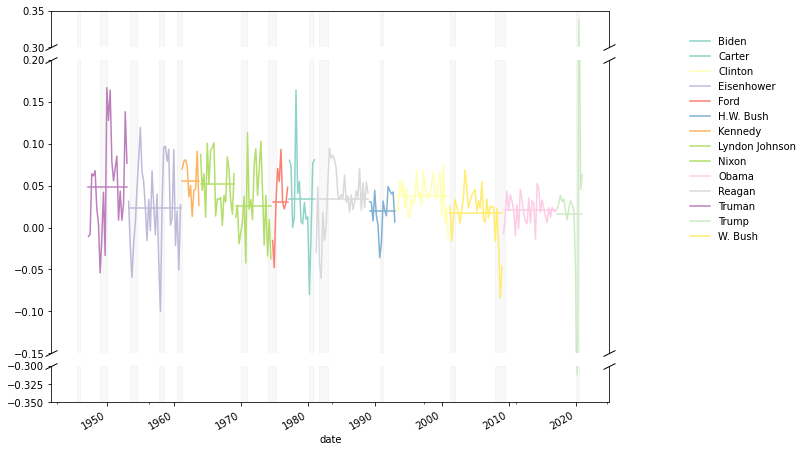

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, gridspec_kw={'height_ratios': [1, 8, 1]}, figsize=(10,8))
fig.subplots_adjust(hspace=0.1)  # adjust space between axes

for name, group in zzz.groupby(['president']):
    for ax in (ax1, ax2, ax3):
        plot_obj = group.plot(x="date", y="delta_an", ax=ax, label=name, legend =False)
        group.plot(x="date", y="perc", ax=ax,
            color=plot_obj.lines[-1].get_color(),
            label=name, legend=False)

for x in recessions:
    if x[0] >= np.datetime64('1939-01-01'):
        for ax in (ax1, ax2, ax3):
            ax.axvspan(x[0], x[1], alpha=0.05, color='grey')

ax3.set_ylim(-0.35, -0.3)  # outliers only
ax2.set_ylim(-0.15, 0.2)  # most of the data
ax1.set_ylim(0.3,0.35)

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax1.tick_params(labeltop=False, bottom=False, which = 'both')
ax2.tick_params(bottom=False, which = 'both')

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
ax2.plot([0, 1], [0, 0], transform=ax2.transAxes, **kwargs)
ax3.plot([0, 1], [1, 1], transform=ax3.transAxes, **kwargs)

#fix_legend(ax)
handles, labels = ax3.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor = (1.0,.85), frameon = False, bbox_transform=fig.transFigure)

In [7]:
fig.gca().plot(zzz.date,zzz.delta)
fig.

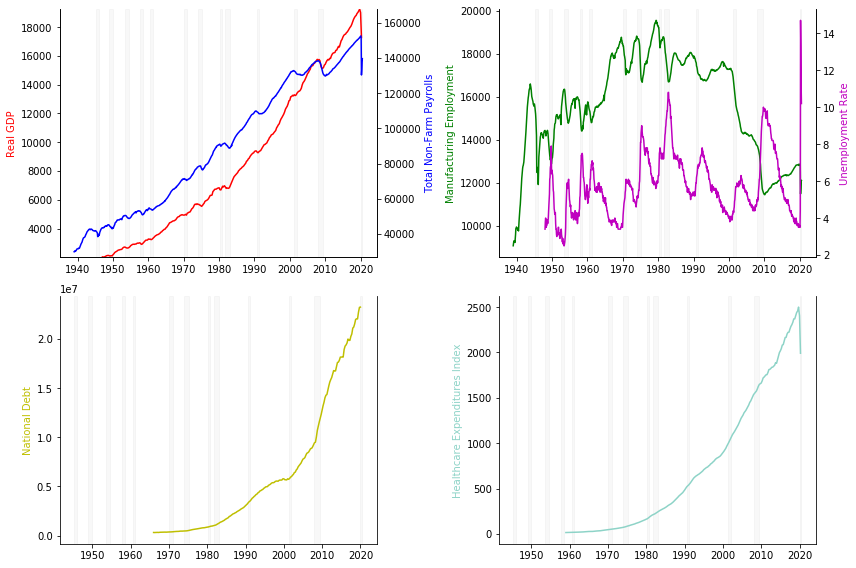

In [7]:
## Plot the different raw timeseries
recessions = get_recession_intervals(data['recession'])

fig, axes = plt.subplots(2,2,figsize = (12,8))

ax1 = axes[0,0]
ax2 = axes[0,1]
ax3 = axes[1,0]
ax4 = axes[1,1]

for x in recessions:
    if x[0] >= np.datetime64('1939-01-01'):
        ax1.axvspan(x[0], x[1], alpha=0.05, color='grey')
        ax2.axvspan(x[0], x[1], alpha=0.05, color='grey')
        ax3.axvspan(x[0], x[1], alpha=0.05, color='grey')
        ax4.axvspan(x[0], x[1], alpha=0.05, color='grey')

ax1.set_ylim(realGDP.min(),realGDP.max())
p1, = ax1.plot(realGDP.index,realGDP.values,color='r')
ax1b = ax1.twinx()
p2, = ax1b.plot(totNonFarmEmpl.index,totNonFarmEmpl.values,color='b')
ax1b.set_ylim(totNonFarmEmpl.min()*0.9,totNonFarmEmpl.max()*1.1)
p3, = ax2.plot(ManufacturingEmpl.index,ManufacturingEmpl.values, color = 'g')
ax2b = ax2.twinx()
p4, = ax2b.plot(unemploymentRate.index,unemploymentRate.values,color = 'm')
p5, = ax3.plot(debt.index,debt.values,color='y')
p6, = ax4.plot(PersonalHealthcareExpenditures.index,PersonalHealthcareExpenditures.values)
## No spines visible at top:
ax1.spines['top'].set_visible(False)
ax1b.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2b.spines['top'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax4.spines['top'].set_visible(False)
## Set y-axis labels:
ax1.set_ylabel("Real GDP")
ax1b.set_ylabel("Total Non-Farm Payrolls")
ax2.set_ylabel("Manufacturing Employment")
ax2b.set_ylabel("Unemployment Rate")
ax3.set_ylabel("National Debt")
ax4.set_ylabel("Healthcare Expenditures Index")
## Set y-axis label colors:
ax1.yaxis.label.set_color(p1.get_color())
ax1b.yaxis.label.set_color(p2.get_color())
ax2.yaxis.label.set_color(p3.get_color())
ax2b.yaxis.label.set_color(p4.get_color())
ax3.yaxis.label.set_color(p5.get_color())
ax4.yaxis.label.set_color(p6.get_color())
fig.tight_layout()
#ax.spines['right'].set_visible(False)

In [8]:
def percentageChange(x,var):
    x.index.min

def seriesTransforms(x, seriesName, periodUnit):
    if periodUnit == "Month":
        p = 12
    elif periodUnit == "Quarter":
        p = 4
    elif periodUnit == "Year":
        p = 1
    else:
        raise(ValueError('periodUnit must be one of: Month, Quarter or Year'))
    
    geomMean = lambda x: np.exp(np.log(x).mean()) - 1
    
    geomMeanPeriod = lambda x: (geomMean(x)+1)**p - 1
    
    def seriesAgg(x,gv,v,p,f):
        z = (x.groupby(gv)
             .apply(lambda x: x[v] / x[v].shift(periods=1))
             .rolling(p).agg(f)
             .reset_index(level = 0,drop=True))
        return(z)
    
    df = (
        x.to_frame()
         .assign(**{periodUnit : lambda x: x.index})
         .assign(President = lambda x: x.index.map(president))
         .query("President != 'N/A'")
         .assign(pu_si = lambda x: x.sort_index().groupby("President").cumcount())
         .assign(Term = lambda x: x.pu_si.apply(lambda z: '2nd' if z > (4*p-1) else '1st'))
         #.assign(pc = lambda x: x[0].diff(periods=p) / x[0].shift(periods=p))
         .assign(pc = lambda x: x[0] / x[0].shift(periods=1))
         .assign(ppc = lambda x: (x[0] / x[0].shift(periods=1)).rolling(p).agg(geomMeanPeriod))
         #.assign(pc = lambda x: (x.ppc.rolling(p).agg(geoMean))**p - 1)
         #.assign(pc = lambda x: seriesAgg(x,'President',0,p,geomMeanPeriod))
         .assign(pm = lambda x: x.groupby('President')['pc'].transform(geomMeanPeriod))
         .assign(ptm = lambda x: x.groupby(['President','Term'])['pc'].transform(geomMeanPeriod))
         .rename(columns =
                 {0: seriesName,
                 'ppc': seriesName + ' Percentage Change',
                 'pu_si' : periodUnit + 's Since Inauguration',
                 'pm' : 'Presidential Mean',
                 'ptm' : 'Presidential Term Mean'})
    )
    return(df)

In [16]:
# periodUnit = 'Quarter'
# p=4
# geomMean = lambda x: np.exp(np.nanmean(np.log(x))) - 1
# geomMeanPeriod = lambda x: (geomMean(x)+1)**p - 1
    
# def seriesAgg(x,gv,v,p,f):
#     z = (x.groupby(gv)
#         .apply(lambda x: x[v] / x[v].shift(periods=1))
#         .rolling(p).agg(f)
#         .reset_index(level = 0,drop=True))
#     return(z)

# (realGDP.to_frame()
#          .assign(**{periodUnit : lambda x: x.index})
#          .assign(President = lambda x: x.index.map(president))
#          .query("President != 'N/A'")
#          .assign(pu_si = lambda x: x.sort_index().groupby("President").cumcount())
#          .assign(Term = lambda x: x.pu_si.apply(lambda z: '2nd' if z > (4*p-1) else '1st'))
#          .assign(pc = lambda x: x[0] / x[0].shift(periods=1))
#          #.assign(pc = lambda x: (x[0] / x[0].shift(periods=1))**p - 1)
#          .assign(ppcr = lambda x: (x[0] / x[0].shift(periods=1)).rolling(p).agg(geomMeanPeriod))
#          #.assign(pc = lambda x: (x.ppc.rolling(p).agg(geoMean))**p - 1)
#          #.assign(pc = lambda x: seriesAgg(x,'President',0,p,geomMeanPeriod))
#          .assign(pm = lambda x: x.groupby('President')['pc'].transform(geomMean))
# )

In [9]:
## Calculate GDP growth by president
df_RealGDP = seriesTransforms(x=realGDP,seriesName = 'Real GDP',periodUnit = 'Quarter')
df_payrolls = seriesTransforms(x=totNonFarmEmpl,seriesName = 'Total Non-farm Payrolls',periodUnit = 'Month')
df_unemployment = seriesTransforms(x=unemploymentRate,seriesName = 'Unemployment Rate',periodUnit = 'Month')
df_manufEmpl = seriesTransforms(x=ManufacturingEmpl,seriesName = 'Manufacturing Employment',periodUnit = 'Month')
df_debt = seriesTransforms(x = debt, seriesName = "National Debt",periodUnit = 'Quarter')
df_PersonalHealthcareExpenditures = seriesTransforms(
    x=PersonalHealthcareExpenditures,
    seriesName = 'Personal Health Care Expenditures',
    periodUnit = 'Quarter')

In [10]:
def plotPercentageChange(df,var,title):
    
    df = df.copy(deep=True)
    
    fig, ax = plt.subplots(figsize=(15,6))
    
    for name, group in df.groupby(['President']):
        group.plot(y=var, ax=ax, label=name)
    
    for name, group in df.groupby(['President','Term']):
        group.plot(y="Presidential Term Mean", ax = ax, label=name, color = 'black',legend=False)
    
    for x in recessions:
        if x[0] >= np.datetime64('1945-01-01'):
            ax.axvspan(x[0], x[1], alpha=0.05, color='grey')
    
    Presidents = df.President.unique().tolist()
    df['Mean'] = np.exp(np.nanmean(np.log(df[var].values + 1))) - 1
    df.plot(y='Mean',style='b--',ax=ax)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels[0:len(Presidents)], handles[0:len(Presidents)]))
    plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor = (1.25,1.0), frameon = False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.axhline(y=0,color='black',linewidth = 0.5)
    plt.title(title)
    return(fig)

In [12]:
df_RealGDP.tail(20)

,Real GDP,Quarter,President,Quarters Since Inauguration,Term,pc,Real GDP Percentage Change,Presidential Mean,Presidential Term Mean
2015-04-01,17405.669,2015-04-01,Obama,24,2nd,1.007414,0.033500,0.021199,0.022747
2015-07-01,17463.222,2015-07-01,Obama,25,2nd,1.003307,0.024410,0.021199,0.022747
2015-10-01,17468.902,2015-10-01,Obama,26,2nd,1.000325,0.019009,0.021199,0.022747
2016-01-01,17556.839,2016-01-01,Obama,27,2nd,1.005034,0.016163,0.021199,0.022747
2016-04-01,17639.417,2016-04-01,Obama,28,2nd,1.004703,0.013429,0.021199,0.022747
2016-07-01,17735.074,2016-07-01,Obama,29,2nd,1.005423,0.015567,0.021199,0.022747
2016-10-01,17824.231,2016-10-01,Obama,30,2nd,1.005027,0.020341,0.021199,0.022747
2017-01-01,17925.256,2017-01-01,Obama,31,2nd,1.005668,0.020984,0.021199,0.022747
2017-04-01,18021.048,2017-04-01,Trump,0,1st,1.005344,0.021635,0.019194,0.019194
2017-07-01,18163.558,2017-07-01,Trump,1,1st,1.007908,0.024160,0.019194,0.019194


The blue dashed line represents the average annual growth rate of real GDP over the timespan displayed. Black line segments represent average annual growth rates of real GDP over the given presidential term.

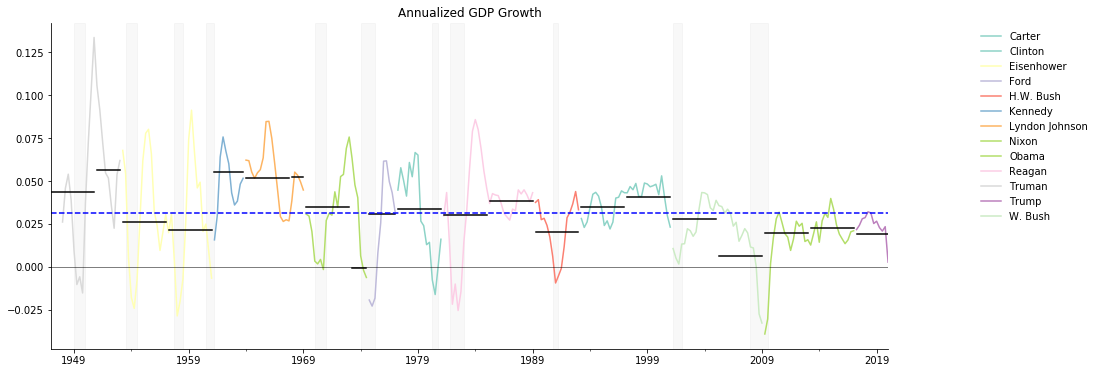

In [13]:
plotPercentageChange(df_RealGDP,"Real GDP Percentage Change","Annualized GDP Growth").show()

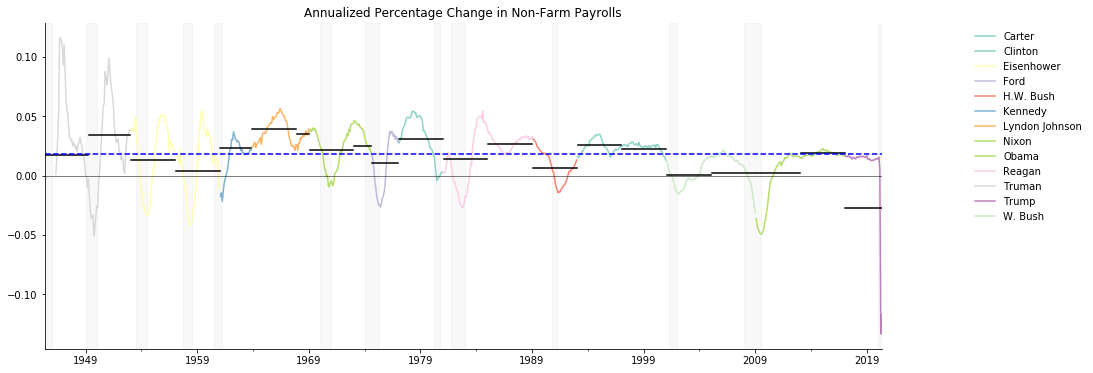

In [14]:
## Calculate payrolls growth by president and plot results
plotPercentageChange(
    df_payrolls,
    "Total Non-farm Payrolls Percentage Change",
    "Annualized Percentage Change in Non-Farm Payrolls").show()

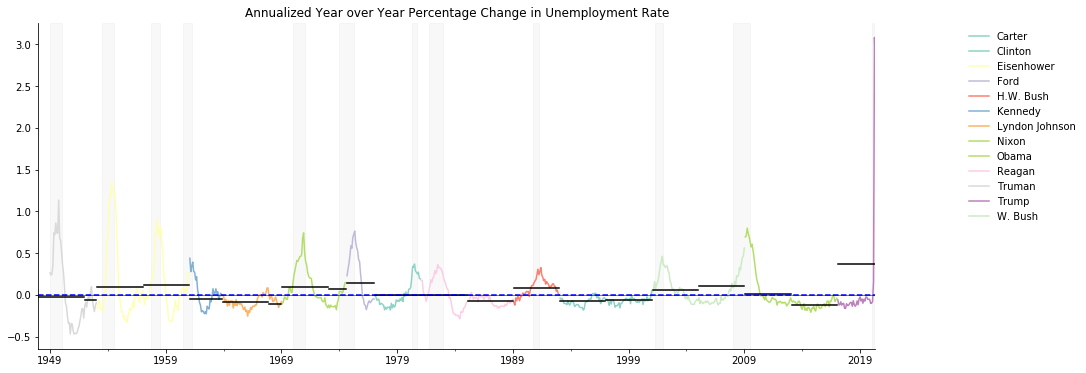

In [15]:
plotPercentageChange(
    df_unemployment,
    "Unemployment Rate Percentage Change",
    "Annualized Year over Year Percentage Change in Unemployment Rate").show()

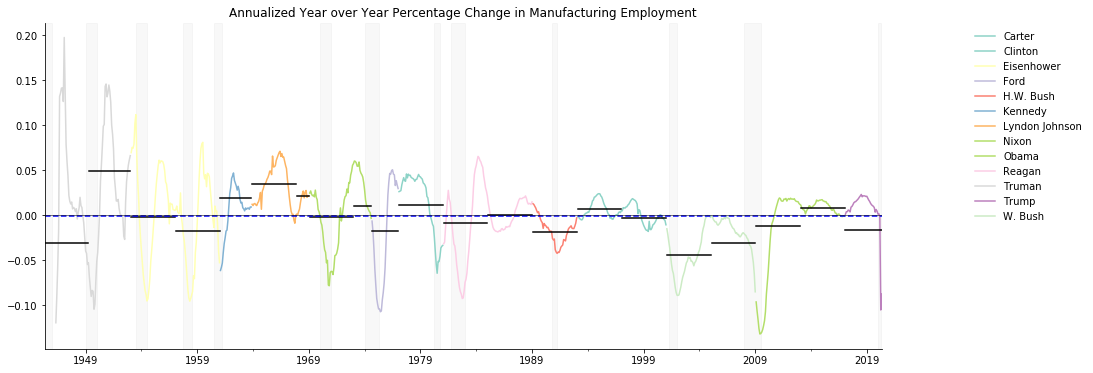

In [16]:
plotPercentageChange(
    df_manufEmpl,
    "Manufacturing Employment Percentage Change",
    "Annualized Year over Year Percentage Change in Manufacturing Employment").show()

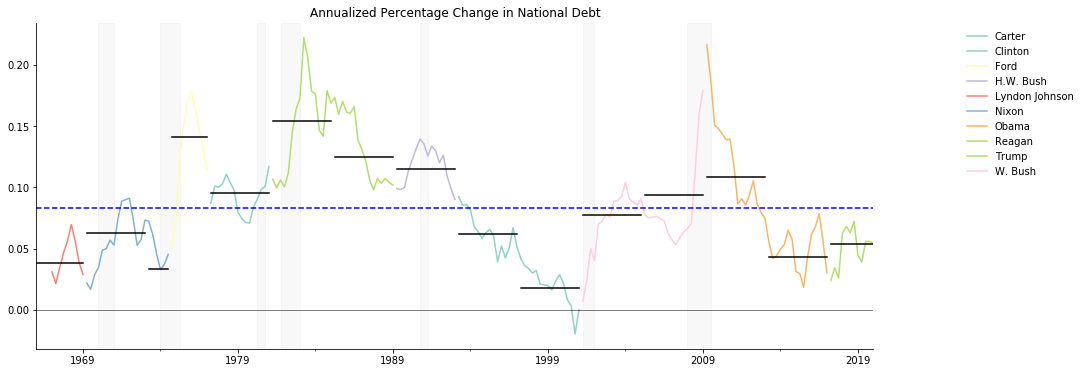

In [17]:
plotPercentageChange(
    df_debt,
    "National Debt Percentage Change",
    "Annualized Percentage Change in National Debt").show()

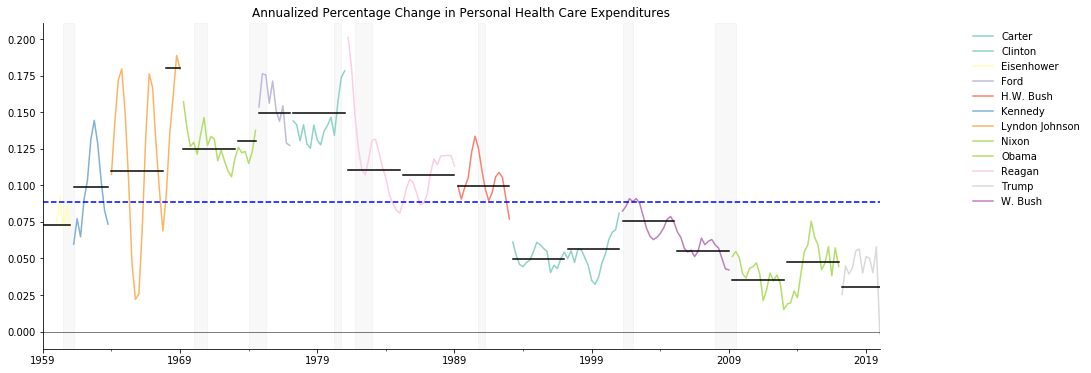

In [18]:
plotPercentageChange(
    df_PersonalHealthcareExpenditures,
    "Personal Health Care Expenditures Percentage Change",
    "Annualized Percentage Change in Personal Health Care Expenditures").show()

In [51]:
start_dt = '2013-01-01'
end_dt = '2017-01-01'


def avg_annl_chg(df,var,end_dt,start_dt):
    day_diff = du.parser.parse(end_dt) - du.parser.parse(start_dt)
    year_diff = day_diff/dt.timedelta(365.25)
    z = np.exp(np.log(df.loc[end_dt,var]/df.loc[start_dt,var])/year_diff) - 1
    return(z)
    
df_RealGDP.loc[end_dt,'Real GDP']/df_RealGDP.loc[start_dt,'Real GDP']

1.097316639406642

In [52]:
avg_annl_chg(df_RealGDP,'Real GDP',end_dt,start_dt)

0.02348855640687364

In [24]:
x = np.datetime64(end_dt) - np.datetime64(start_dt)

In [45]:
import dateutil as du
import datetime as dt

In [44]:
round(4*(dateutil.parser.parse(end_dt) - dateutil.parser.parse(start_dt))/datetime.timedelta(365.25))

12

In [40]:
datetime.timedelta

Init signature: datetime.timedelta(self, /, *args, **kwargs)
Docstring:     
Difference between two datetime values.

timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0)

All arguments are optional and default to 0.
Arguments may be integers or floats, and may be positive or negative.
File:           c:\users\grego\anaconda3\lib\datetime.py
Type:           type
Subclasses:     _Timedelta
